## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

![CRISP](CRISP.png)

We will follow the following steps of CRISP
- ***1. Business Issue Understanding***
- ***2. Data Understanding***
- ***3. Data Preperation***
- ***4. Building the Model***
- ***5. Validating the model***
- ***6. Presenting the findings***

### 1. Business Issue Understanding

Definitions of churn can vary, with two primary approaches:

***1. Revenue-based churn:***

-  Identifying customers who haven't utilized revenue-generating services like mobile internet, outgoing calls, or SMS over a specific timeframe. Alternatively, this can be quantified by metrics like those who have generated less than INR 4 per month in total/average/median revenue.
- A drawback of this definition is its inability to account for customers who only receive calls/SMS from wage-earning counterparts without generating revenue themselves, particularly prevalent in rural areas.
Usage-based churn:

***2.Usage-based churn:***
- Identifying customers who haven't engaged in any usage activities, be it incoming or outgoing, such as calls or internet, over a specified period.
- A limitation of this definition is that by the time a customer has stopped using the services for a while, it may be too late to implement retention strategies. For example, defining churn based on a 'two-months zero usage' period might prove futile since the customer may have already switched to another provider.

For this project, the definition of churn will be based on usage metrics.

### 2. Data Understanding

In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
telecom_df = pd.read_csv("train.csv")
telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [2]:
telecom_df.dtypes

id                     int64
circle_id              int64
loc_og_t2o_mou       float64
std_og_t2o_mou       float64
loc_ic_t2o_mou       float64
                      ...   
aon                    int64
aug_vbc_3g           float64
jul_vbc_3g           float64
jun_vbc_3g           float64
churn_probability      int64
Length: 172, dtype: object

In [3]:
telecom_df.shape

(69999, 172)

In [4]:
telecom_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [5]:
telecom_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

#### Check Null Values

In [6]:
(telecom_df.isnull().sum() / telecom_df.isnull().count() * 100).sort_values(ascending=False).head(50)

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_3g_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
count_rech_2g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
arpu_3g_8   

#### Check Skewness of data

In [7]:
numeric_cols = telecom_df.select_dtypes('number').columns

In [8]:
len(numeric_cols)

163

In [9]:
numeric_cols

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=163)

In [10]:
#Calculate skew
df_numeric_cols = telecom_df[numeric_cols]
skewness = df_numeric_cols.skew()
skew_df = pd.DataFrame({'Column': skewness.index, 'Skew': skewness.values})
skew_df_sorted = skew_df.sort_values(by='Skew', ascending=False)
print(skew_df_sorted.head(50))

               Column        Skew
50       isd_og_mou_6  141.593408
52       isd_og_mou_8  139.653487
51       isd_og_mou_7  139.475406
58        og_others_8  130.125779
57        og_others_7  127.397203
56        og_others_6  118.034988
98        ic_others_6   66.971744
99        ic_others_7   54.758072
100       ic_others_8   45.753767
54       spl_og_mou_7   42.729168
30   loc_og_t2c_mou_7   42.566671
95       isd_ic_mou_6   39.014140
82   std_ic_t2f_mou_8   33.495881
75   std_ic_t2t_mou_7   32.231431
80   std_ic_t2f_mou_6   31.133297
81   std_ic_t2f_mou_7   28.164343
92       spl_ic_mou_6   27.434156
15      roam_ic_mou_7   27.373082
96       isd_ic_mou_7   27.195691
76   std_ic_t2t_mou_8   25.965310
74   std_ic_t2t_mou_6   25.908966
16      roam_ic_mou_8   25.776788
94       spl_ic_mou_8   25.569164
53       spl_og_mou_6   25.086386
19      roam_og_mou_8   23.746728
42   std_og_t2f_mou_7   23.472912
41   std_og_t2f_mou_6   23.464522
106  total_rech_amt_8   22.666016
29   loc_og_t2

#### Derived Column Analysis

In [77]:
# There is an aon columns which talks about the age of the consumer on network. How long the person has been on the network. 
# Lets see if the churn probability can be explained
# Lets convert the aon into years

telecom_df['years_of_use'] = (filtered_df['aon']/365).round(0)

In [78]:
telecom_df['years_of_use'].value_counts()

years_of_use
1.0    22881
2.0    13156
3.0     8839
4.0     5403
7.0     4381
9.0     3920
8.0     3754
6.0     3740
5.0     3692
0.0      233
Name: count, dtype: int64

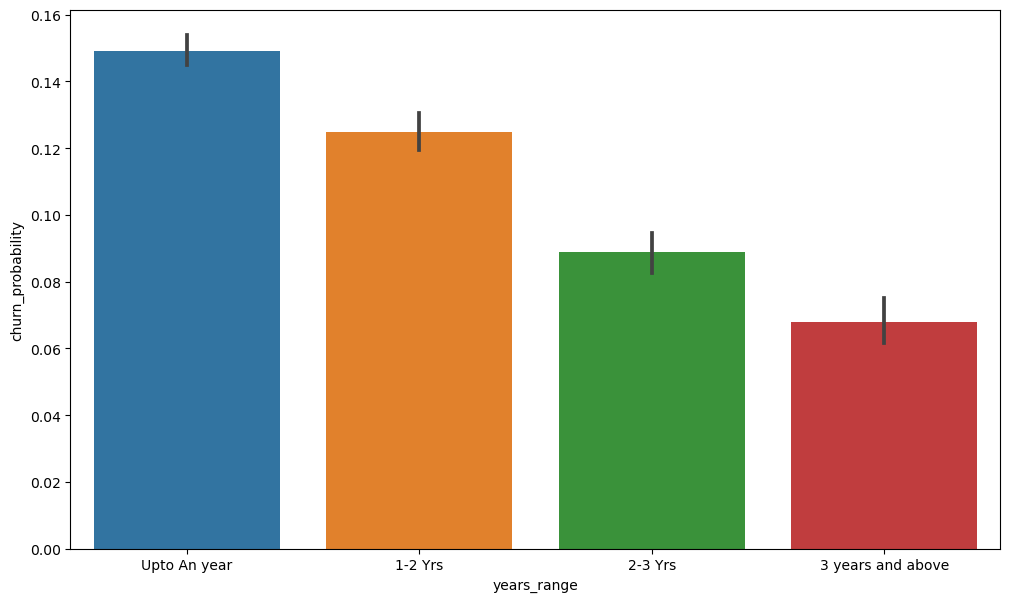

In [82]:
# [HB] Is it just for analysis
tn_range = [0, 1, 2, 3, 4]
tn_label = ['Upto An year', '1-2 Yrs', '2-3 Yrs', '3 years and above']
telecom_df['years_range'] = pd.cut(telecom_df['years_of_use'], tn_range, labels=tn_label)
telecom_df['years_range'].head()

plt.figure(figsize=[12,7])
sns.barplot(x='years_range',y='churn_probability', data=telecom_df )
plt.show()

#### Observation

We can clearly see the more the years they are in the network the probability of churn decreases

### 3. Data Preperation

In [11]:
removed_columns_df =  telecom_df.loc[:, ['id', 'churn_probability']].copy()
telecom_df.drop(columns=['id', 'churn_probability'], inplace=True)

#### Cap Outlier Data

In [12]:
def cap_outliers(column):
    mean_of_col = column.mean()
    std_deviation_of_col = column.std()
    return column.clip(mean_of_col - 2 * std_deviation_of_col, mean_of_col + 2 * std_deviation_of_col)

In [13]:
def clean_outliers(df):
    df_num = df.select_dtypes(include=['int64', 'float64'])
    df_num = df_num.apply(cap_outliers, axis=0)
    df[df_num.columns] = df_num;
    return df

In [14]:
telecom_df = clean_outliers(telecom_df)

#### Remove Columns with Missing Values

In [15]:
# Keep columns which have only less than 50 percent missing values
telecom_df = telecom_df.loc[:, telecom_df.isnull().mean() <= 0.5]

#### Derive Months since last recharge column

In [16]:
from datetime import datetime

def calculate_months_since_last_charge_df(row):
    dates = [row[f'date_of_last_rech_{i}'] for i in range(8, 5, -1)]

    for i, date in enumerate(dates):
        if date and not pd.isna(date):
            if datetime.strptime(date, '%m/%d/%Y'):
                return i
    return 3

In [17]:
def derive_column(data):
    # Calculate months_since_last_charge and drop corresponding date fields
    last_recharge_fields = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
    data['months_since_last_charge'] = data[last_recharge_fields].apply(calculate_months_since_last_charge_df, axis=1)
    data.drop(last_recharge_fields, axis=1, inplace=True)
    return data

In [18]:
telecom_df = derive_column(telecom_df)

In [19]:
telecom_df.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,months_since_last_charge
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,...,0.000000,0.0,0.0,0.0,0.0,1958.0,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,...,0.844108,0.0,0.0,0.0,0.0,710.0,0.0,0.0,0.0,0
2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,...,0.000000,0.0,0.0,0.0,0.0,882.0,0.0,0.0,0.0,0
3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,111.095,...,0.000000,0.0,0.0,0.0,0.0,982.0,0.0,0.0,0.0,0
4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,...,0.000000,0.0,0.0,1.0,0.0,647.0,0.0,0.0,0.0,0


#### Impute Values

In [20]:
from sklearn.impute import SimpleImputer
def impute_values(data):
    median_imputer = SimpleImputer(strategy='median')
    mode_imputer = SimpleImputer(strategy='most_frequent')
    numerical_cols = data.select_dtypes(include='number').columns
    categorical_cols = data.select_dtypes(include='object').columns
    data[numerical_cols] = median_imputer.fit_transform(data[numerical_cols])
    data[categorical_cols] = mode_imputer.fit_transform(data[categorical_cols])
    data.drop_duplicates()
    data = data.loc[:, data.nunique() > 1]
    return data

In [21]:
telecom_df = impute_values(telecom_df)

In [22]:
telecom_df.shape

(69999, 125)

In [23]:
removed_columns_df.shape

(69999, 2)

In [24]:
telecom_df = pd.concat([telecom_df, removed_columns_df], axis=1)
telecom_df.shape

(69999, 127)

#### Check Corelation

Text(0.5, 1.0, 'Features Correlating with Churn variable')

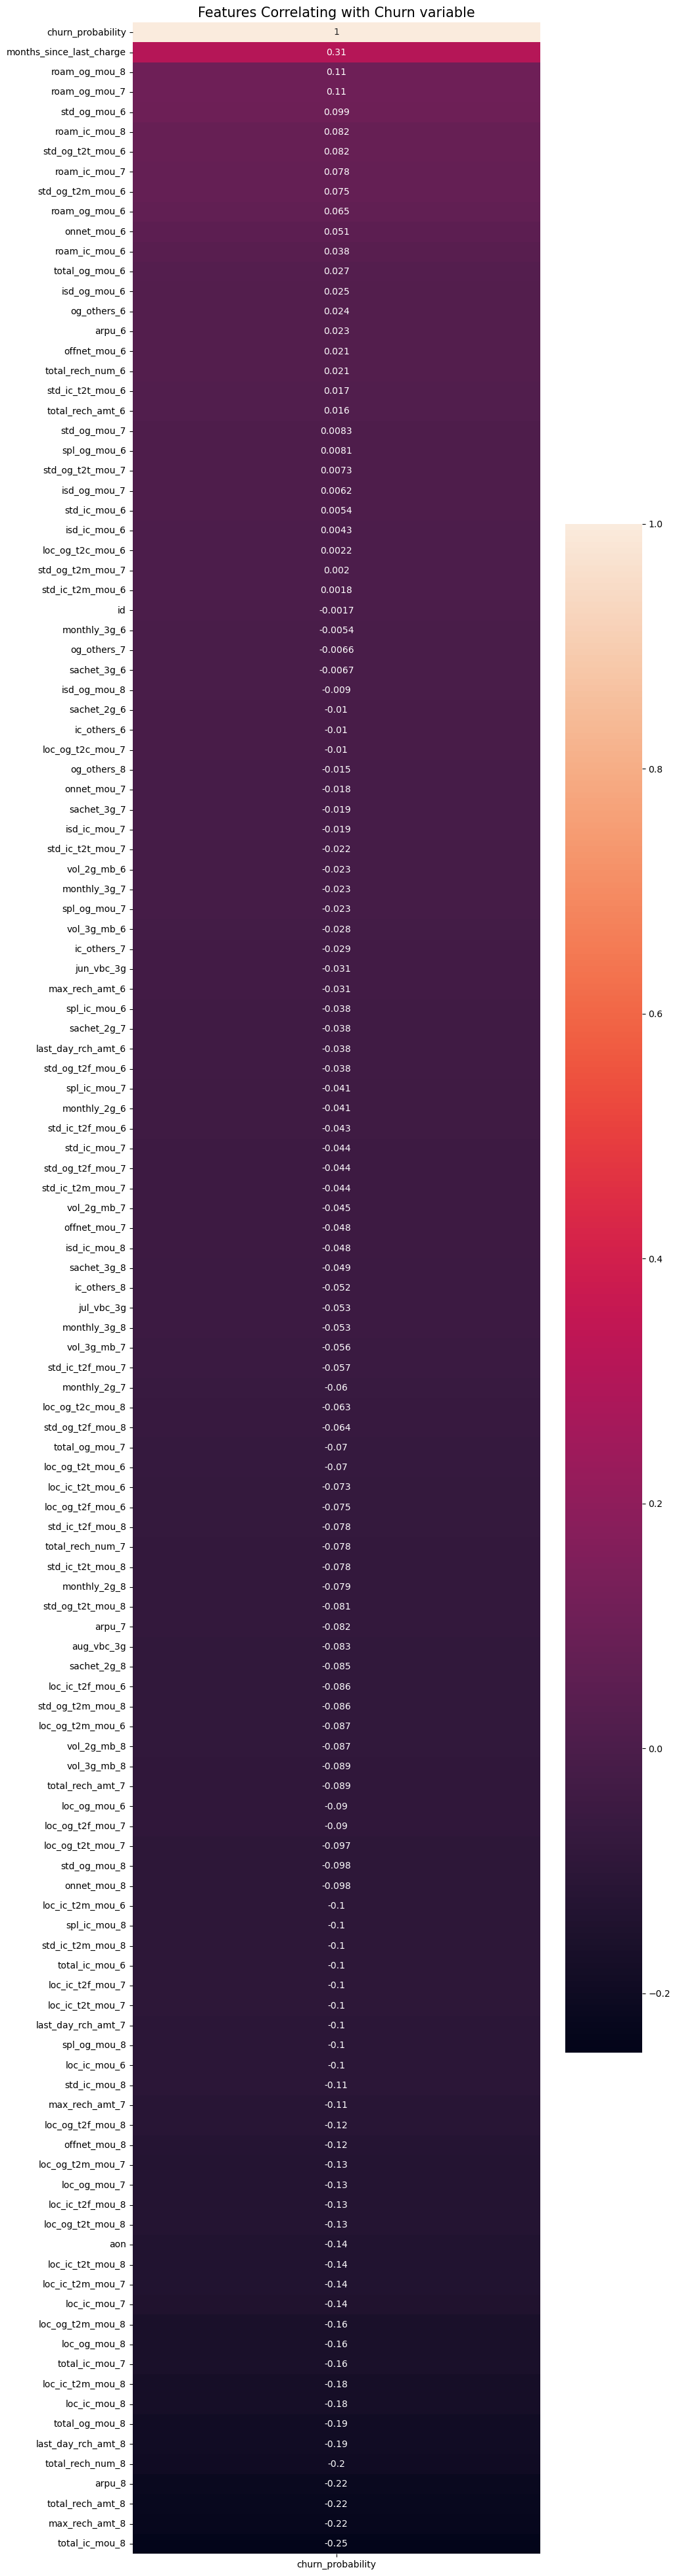

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(telecom_df.corr()[['churn_probability']].sort_values(ascending=False, by='churn_probability'),annot=True)
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

***Observations***

Observations gleaned from the heatmaps reveal the following key insights:

- Notable significance lies in the recharge or usage metrics (such as minutes of usage and amount spent) during the eighth month, showing a negative impact on churn probability.
- The duration since the last recharge holds significance, exhibiting a positive correlation with churn probability.
- Average outgoing calls and roaming calls during the sixth and seventh months exhibit a positive correlation with churn likelihood.

### 4. Building the model

We will try
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Random Forest with PCA
5. K Nearest Neighbour Classifier
6. XGB Classifier

#### Test Train split

In [26]:
from sklearn.model_selection import train_test_split
telecom_df.drop("id", axis=1, inplace=True)

X = telecom_df.drop("churn_probability", axis = 1)
y = telecom_df.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

#### Define the model

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

logistic_regression = Pipeline([('scl', StandardScaler()),
                   ('LR', LogisticRegression(random_state=1))])
# descion tree
decision_tree =Pipeline([('scl', StandardScaler()),
                   ('DT', DecisionTreeClassifier(random_state=1))])
# Random Forest
random_forest = Pipeline ([
    ('scl', StandardScaler()),
    ('RF', RandomForestClassifier(random_state=1))
])

random_forest_pca = Pipeline ([
    ('scl', StandardScaler()),
    ('pca', IncrementalPCA(n_components=20)),
    ('RF', RandomForestClassifier(random_state=1))
])


# K Nearest Neighbour
knn =Pipeline([('scl', StandardScaler()),
                   ('KNN', KNeighborsClassifier())])
# XGB
xgb =Pipeline([('scl', StandardScaler()),
                   ('XGB', XGBClassifier(random_state=1))])

#### Fit Logistic Regression Model

In [28]:
logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('LR', LogisticRegression(random_state=1))])

In [29]:
print("Train Score",logistic_regression.score(X_train, y_train))
print("Test Score",logistic_regression.score(X_test, y_test))

Train Score 0.9317945264189065
Test Score 0.9306190476190476


<Axes: ylabel='Feature'>

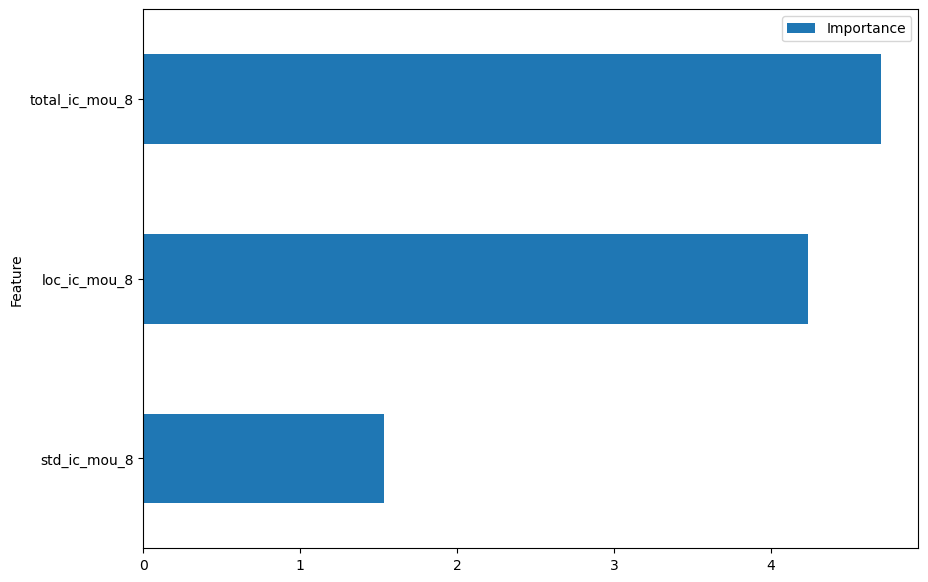

In [73]:
coefficients = logistic_regression['LR'].coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True).tail(3)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 7))

#### Observation
Its very clear from the above graph that the Month 8 KPI's are very significant influence in determining the churn

#### Fit Decicion Tree Model

In [30]:
decision_tree.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('DT', DecisionTreeClassifier(random_state=1))])

In [31]:
print("Train Score",decision_tree.score(X_train, y_train))
print("Test Score",decision_tree.score(X_test, y_test))

Train Score 1.0
Test Score 0.9055238095238095


#### Fit Random Forest Model

In [32]:
random_forest.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('RF', RandomForestClassifier(random_state=1))])

In [33]:
print("Train Score",random_forest.score(X_train, y_train))
print("Test Score",random_forest.score(X_test, y_test))

Train Score 0.9998775485213984
Test Score 0.9397142857142857


#### Fit Random Forest Model with PCA

In [34]:
random_forest_pca.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('pca', IncrementalPCA(n_components=20)),
                ('RF', RandomForestClassifier(random_state=1))])

In [35]:
print("Train Score",random_forest_pca.score(X_train, y_train))
print("Test Score",random_forest_pca.score(X_test, y_test))

Train Score 0.9999795914202331
Test Score 0.9177142857142857


#### Fit K Nearest Neighbour Classifier

In [36]:
knn.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('KNN', KNeighborsClassifier())])

In [37]:
print("Train Score",knn.score(X_train, y_train))
print("Test Score",knn.score(X_test, y_test))

Train Score 0.9342843731504724
Test Score 0.912


#### Fit XGB Classifier

In [38]:
xgb.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=1, ...))])

In [39]:
print("Train Score",xgb.score(X_train, y_train))
print("Test Score",xgb.score(X_test, y_test))

Train Score 0.9843874364782955
Test Score 0.9375714285714286


#### Scores For Models We have Created

Let us look at the scores. We can clearly see that Random Forest & XGB is giving good test scores of 0.94

| Model | Train Score | Test Score |
| --- | --- | --- |
| Logistic Regression | 0.93 | 0.93 |
| Decision Tree | 1.0 | 0.91 |
| Random Forest | 1.0 | 0.94 |
| Random Forest With PCA | 1.0 | 0.92 |
| K Nearest Neighbour| 0.93 | 0.91 |
| XGB | 0.98 | 0.94 |

### Using GridSearch

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
def rf_classifier_with_grid_search():
    rf_classifier = RandomForestClassifier()

    #Define the grid of hyperparameters to search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform Grid Search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters found by Grid Search
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Instantiate the Random Forest classifier with the best hyperparameters
    best_rf_classifier = RandomForestClassifier(**best_params)

    # Train the classifier on the training data
    best_rf_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = best_rf_classifier.predict(X_test)

    # Evaluate the performance of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)



In [41]:
# Have commented this call for grid search because it is very resource intensive. When this is run we will see that with grid search 
# there is a slight improvement in accuracy for Random Forest Classisifer. But not a very signmificant change
#rf_classifier_with_grid_search()

In [42]:
def xgb_classifier_with_grid_search():
    xgb_classifier = XGBClassifier()

    # Define the grid of hyperparameters to search
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0],
        'gamma': [0, 0.1, 0.2]
    }



    # Perform Grid Search to find the best hyperparameters
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best parameters found by Grid Search
    best_params = grid_search.best_params_
    print("Best Parameters:", best_params)

    # Instantiate the XGBoost classifier with the best hyperparameters
    best_xgb_classifier = XGBClassifier(**best_params)

    # Train the classifier on the training data
    best_xgb_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = best_xgb_classifier.predict(X_test)

    # Evaluate the performance of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

In [43]:
# Have commented this call for grid search because it is very resource intensive. When this is run we will see that with grid search the score has
# improved a bit to 0.942 which is a slight improvement over the normal xgb which gave 0.94. 
#xgb_classifier_with_grid_search()

In [44]:
# The best parameters using xgb GridSearch was as given below. We have used this parameters with xgb to generate the submission for Kaggle
# But used normal xgb model in step 5 so that we can run the sheet end to end

#Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
#Accuracy: 0.9416666666666667

### 5. Predicting using the model

In [45]:
data_unseen=pd.read_csv("test.csv")

In [46]:
removed_columns_df =  data_unseen.loc[:, ['id']].copy()
data_unseen.drop(columns=['id'], inplace=True)

In [47]:
data_unseen.shape

(30000, 170)

In [48]:
data_unseen = clean_outliers(data_unseen)

In [49]:
data_unseen = data_unseen.loc[:, data_unseen.isnull().mean() <= 0.5]

In [50]:
data_unseen = derive_column(data_unseen)

In [51]:
data_unseen = impute_values(data_unseen)

In [52]:
data_unseen.shape

(30000, 125)

In [53]:
# This is the code for prediction using GridSearch Based XGBClassifier. Commented and using normal xgb classifier

In [54]:
#best_params = {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
#best_xgb_classifier = XGBClassifier(**best_params)
#best_xgb_classifier.fit(X_train, y_train)
#data_unseen['churn_probability'] = best_xgb_classifier.predict(data_unseen)

In [55]:
data_unseen['churn_probability'] = xgb.predict(data_unseen)
data_unseen = pd.concat([removed_columns_df, data_unseen], axis=1)

In [56]:
data_unseen.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,months_since_last_charge,churn_probability
0,69999,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,...,0.0,0.0,0.0,0.0,1692.0,0.00,0.000000,0.00,0.0,0
1,70000,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,...,0.0,0.0,0.0,0.0,2533.0,0.00,0.000000,0.00,0.0,0
2,70001,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,...,0.0,0.0,0.0,0.0,277.0,525.61,626.445273,241.84,0.0,1
3,70002,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,...,0.0,0.0,0.0,0.0,1244.0,0.00,0.000000,0.00,0.0,0
4,70003,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,...,0.0,0.0,0.0,0.0,462.0,0.00,0.000000,0.00,0.0,0


In [57]:
final_prediction = data_unseen[['id','churn_probability']]

In [58]:
final_prediction['churn_probability'] = final_prediction.churn_probability.apply(np.int64)
final_prediction['id'] = final_prediction.id.apply(np.int64)

In [59]:
final_prediction.head()

,id,churn_probability
0,69999,0
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [60]:
final_prediction.to_csv('final_prediction.csv',index=False)
final_prediction.shape

(30000, 2)